# 1. Unconstrained optimization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Task 1. Write three oracles for evaluating the following function

$$
\left.
    \begin{array}{lll}
    1. & f_{1}(x_{1},x_{2})=x_{1}^2 + x_{2}^2 -2x_{1}x_{2} & \nabla f_{1}(x_{1},x_{2})=\dbinom{2x_{1}-2x_{2}}{2x_{2}-2x_{1}} \\
    2. & f_{2}(x_{1},x_{2})=10(x_{2} - x_{1}^2)^2 + (1-x_{1})^2 & \nabla f_{2}(x_{1},x_{2})=\dbinom{-40x_{1}*(x_{2}-x_{1}^2) - 2(1-x_{1})}{20(x_{2}-x_{1}^2)} \\
    3. & f_{3}(x)=\frac{1}{2} \left\|x\right\|^2 & \nabla f_{3}(x)=\left(
                                                                        \begin{array}{c} 
                                                                        x_{1}  \\
                                                                        \cdots \\
                                                                        x_{i}  \\
                                                                        \cdots \\
                                                                        x_{n} \\
                                                                        \end{array}
                                                                    \right) \\
    \end{array}
\right.
$$

In [2]:
def oracle1(x, mode):
    if mode==1:
        return x[0]**2 + x[1]**2 -2*x[0]*x[1]
    if mode==2:
        return x[0]**2 + x[1]**2 -2*x[0]*x[1], np.array([2*x[0] - 2*x[1] , 2*x[1] - 2*x[0]])
    if mode==3:
        return np.array([2*x[0] - 2*x[1] , 2*x[1] - 2*x[0]])

def oracle2(x, mode):
    if mode==1:
        return 10*(x[1]-x[0]**2)**2 + (1-x[0])**2
    if mode==2:
        return 10*(x[1]-x[0]**2)**2 + (1-x[0])**2, np.array([-40*x[0]*(x[1]-x[0]**2) -2 * (1-x[0]), 20*(x[1] - x[0]**2)])
    if mode==3:
        return np.array([-40*x[0]*(x[1]-x[0]**2) -2*(1-x[0]), 20*(x[1] - x[0]**2)])

def oracle3(x, mode):
    if mode==1:
        return 1/2 * np.dot(x,x)
    if mode==2:
        return 1/2 * np.dot(x,x) , np.array(x)
    if mode==3:
        return np.array(x)

### Task 2. Implement the Gradient Method

In [3]:
def methode_gradient(oracle, x0, MaxIt=1000, t=0.5, tol=10e-6):
    x=x0
    k=0
    listx=[x0]
    listg=[]
    listf=[]
    while (np.linalg.norm(oracle(x,3)) > tol) and (k < MaxIt):
        listf.append(oracle(x,1))
        listg.append(oracle(x,3))
        x = x - t * oracle(x,3)
        listx.append(x)
        k = k + 1
    #print(f"coordo : {listx}")
    #print(f"valeur : {listf}")
    #print(f"gradients : {listg}")
    if k==MaxIt:
        print(f"l'algorithme n'a pas convergé en moins de {MaxIt} itérations ")
        print(f"Dernier x obtenu : {x}")
        print(f"Dernier gradient obtenu : {oracle(x,3)} ")
        print(f"Dernière valeur de la fonction obtenu: {oracle(x,1)} ")
    else:
        print(f"l'algorithme a convergé en {k} itérations ")
        print(f"Coordonnées de la solution : {x}")
        print(f"Dernier gradient obtenu : {oracle(x,3)} ")
        print(f"Valeur de la solution : {oracle(x,1)} ")
    xi = [listx[i][0] for i in range(len(listx))]
    yi = [listx[i][1] for i in range(len(listx))]   
    plt.plot(xi,yi,'ob')
    plt.show()

#### 1. Functions f<sub>1</sub>, f<sub>2</sub> and f<sub>3</sub>, with dimension of x equal to n=2

l'algorithme n'a pas convergé en moins de 1000 itérations 
Dernier x obtenu : [ 9. 13.]
Dernier gradient obtenu : [-8.  8.] 
Dernière valeur de la fonction obtenu: 16.0 


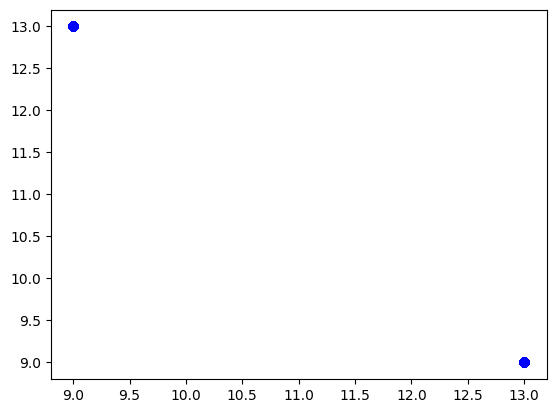

In [24]:
x0=np.array([9,13])
methode_gradient(oracle1, x0, MaxIt=1000, t=0.5)

C:\Users\valen\AppData\Local\Temp\ipykernel_15920\3175712587.py:15: RuntimeWarning: overflow encountered in double_scalars
  return np.array([-40*x[0]*(x[1]-x[0]**2) -2*(1-x[0]), 20*(x[1] - x[0]**2)])
C:\Users\valen\AppData\Local\Temp\ipykernel_15920\3175712587.py:11: RuntimeWarning: overflow encountered in double_scalars
  return 10*(x[1]-x[0]**2)**2 + (1-x[0])**2
C:\Users\valen\AppData\Local\Temp\ipykernel_15920\1108662127.py:10: RuntimeWarning: invalid value encountered in subtract
  x = x - t * oracle(x,3)


l'algorithme a convergé en 6 itérations 
Coordonnées de la solution : [nan inf]
Dernier gradient obtenu : [nan nan] 
Valeur de la solution : nan 


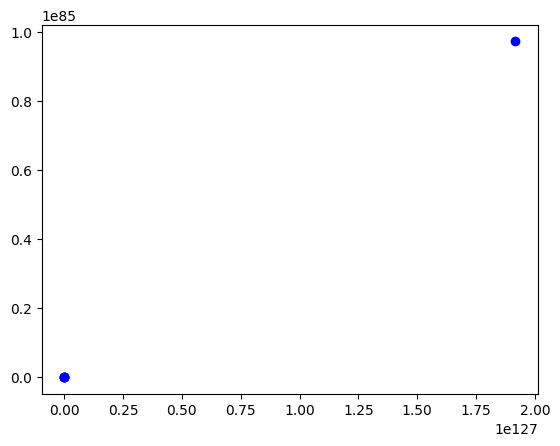

In [5]:
x0=np.array([9,13])
methode_gradient(oracle2, x0, MaxIt=1000, t=0.5)

l'algorithme a convergé en 21 itérations 
Coordonnées de la solution : [4.29153442e-06 6.19888306e-06]
Dernier gradient obtenu : [4.29153442e-06 6.19888306e-06] 
Valeur de la solution : 2.8421709430404007e-11 


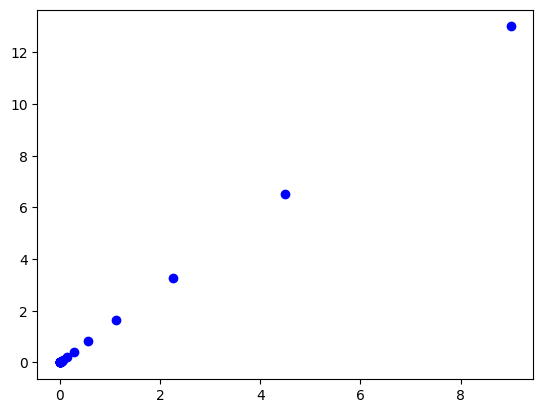

In [6]:
x0=np.array([9,13])
methode_gradient(oracle3, x0)

#### 2. Function f<sub>3</sub> with n=10 and n=10000

l'algorithme a convergé en 21 itérations 
Coordonnées de la solution : [0.00000000e+00 4.76837158e-07 9.53674316e-07 1.43051147e-06
 1.90734863e-06 2.38418579e-06 2.86102295e-06 3.33786011e-06
 3.81469727e-06 4.29153442e-06]
Dernier gradient obtenu : [0.00000000e+00 4.76837158e-07 9.53674316e-07 1.43051147e-06
 1.90734863e-06 2.38418579e-06 2.86102295e-06 3.33786011e-06
 3.81469727e-06 4.29153442e-06] 
Valeur de la solution : 3.240074875066057e-11 


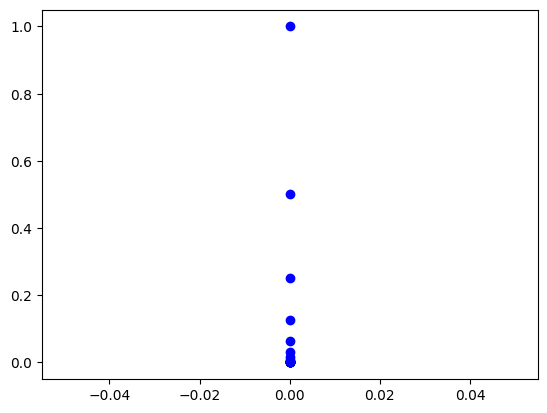

In [7]:
x0=[i for i in range(10)]
methode_gradient(oracle3, x0)

l'algorithme a convergé en 36 itérations 
Coordonnées de la solution : [0.00000000e+00 1.45519152e-11 2.91038305e-11 ... 1.45475497e-07
 1.45490048e-07 1.45504600e-07]
Dernier gradient obtenu : [0.00000000e+00 1.45519152e-11 2.91038305e-11 ... 1.45475497e-07
 1.45490048e-07 1.45504600e-07] 
Valeur de la solution : 3.528774568947404e-11 


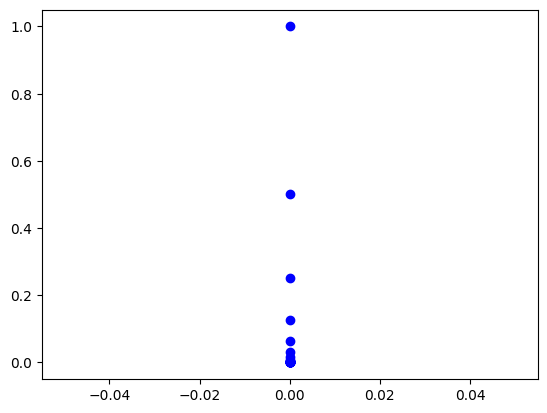

In [8]:
x0=[i for i in range(10000)]
methode_gradient(oracle3, x0)

#### 3. Re-run your code with t=0.01. Compare the results.

l'algorithme a convergé en 342 itérations 
Coordonnées de la solution : [10.99999827 11.00000173]
Dernier gradient obtenu : [-6.91594748e-06  6.91594748e-06] 
Valeur de la solution : 1.1937117960769683e-11 


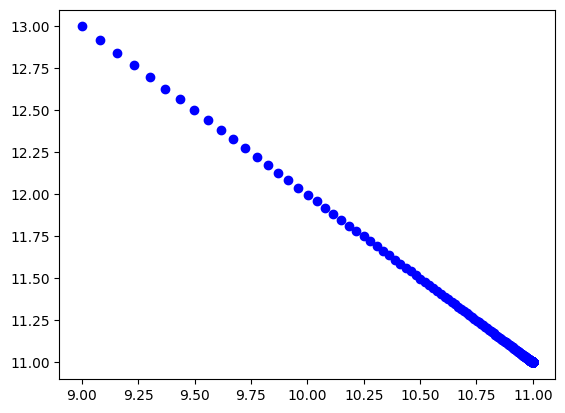

In [9]:
x0=np.array([9,13])
methode_gradient(oracle1, x0, MaxIt=1000, t=0.01)

C:\Users\valen\AppData\Local\Temp\ipykernel_15920\3175712587.py:15: RuntimeWarning: overflow encountered in double_scalars
  return np.array([-40*x[0]*(x[1]-x[0]**2) -2*(1-x[0]), 20*(x[1] - x[0]**2)])
C:\Users\valen\AppData\Local\Temp\ipykernel_15920\3175712587.py:11: RuntimeWarning: overflow encountered in double_scalars
  return 10*(x[1]-x[0]**2)**2 + (1-x[0])**2
C:\Users\valen\AppData\Local\Temp\ipykernel_15920\3175712587.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([-40*x[0]*(x[1]-x[0]**2) -2*(1-x[0]), 20*(x[1] - x[0]**2)])
C:\Users\valen\AppData\Local\Temp\ipykernel_15920\3175712587.py:11: RuntimeWarning: invalid value encountered in double_scalars
  return 10*(x[1]-x[0]**2)**2 + (1-x[0])**2


l'algorithme a convergé en 6 itérations 
Coordonnées de la solution : [inf inf]
Dernier gradient obtenu : [nan nan] 
Valeur de la solution : nan 


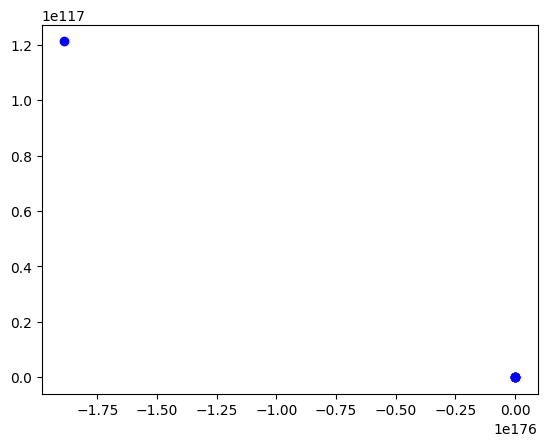

In [10]:
x0=np.array([9,13])
methode_gradient(oracle2, x0, MaxIt=1000, t=0.01)

l'algorithme a convergé en 1421 itérations 
Coordonnées de la solution : [5.64747130e-06 8.15745854e-06]
Dernier gradient obtenu : [5.64747130e-06 8.15745854e-06] 
Valeur de la solution : 4.921903099653978e-11 


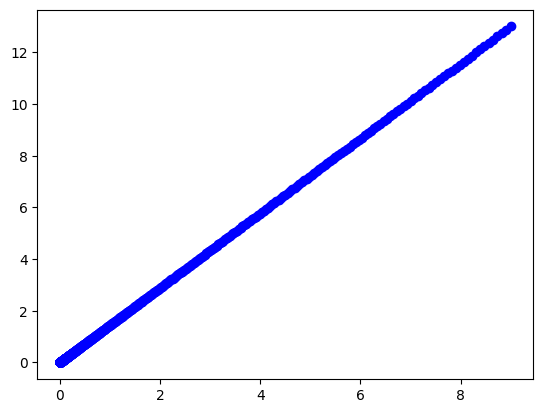

In [12]:
x0=np.array([9,13])
methode_gradient(oracle3, x0, MaxIt=3000, t=0.01)

l'algorithme a convergé en 1427 itérations 
Coordonnées de la solution : [0.00000000e+00 5.90775791e-07 1.18155158e-06 1.77232737e-06
 2.36310317e-06 2.95387896e-06 3.54465475e-06 4.13543054e-06
 4.72620633e-06 5.31698212e-06]
Dernier gradient obtenu : [0.00000000e+00 5.90775791e-07 1.18155158e-06 1.77232737e-06
 2.36310317e-06 2.95387896e-06 3.54465475e-06 4.13543054e-06
 4.72620633e-06 5.31698212e-06] 
Valeur de la solution : 4.9734785102480436e-11 


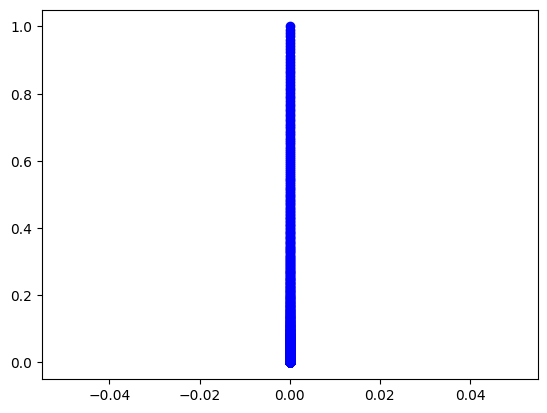

In [13]:
x0=[i for i in range(10)]
methode_gradient(oracle3, x0,MaxIt=3000, t=0.01)

l'algorithme a convergé en 2466 itérations 
Coordonnées de la solution : [0.00000000e+00 1.72341504e-11 3.44683007e-11 ... 1.72289801e-07
 1.72307035e-07 1.72324269e-07]
Dernier gradient obtenu : [0.00000000e+00 1.72341504e-11 3.44683007e-11 ... 1.72289801e-07
 1.72307035e-07 1.72324269e-07] 
Valeur de la solution : 4.949523126779811e-11 


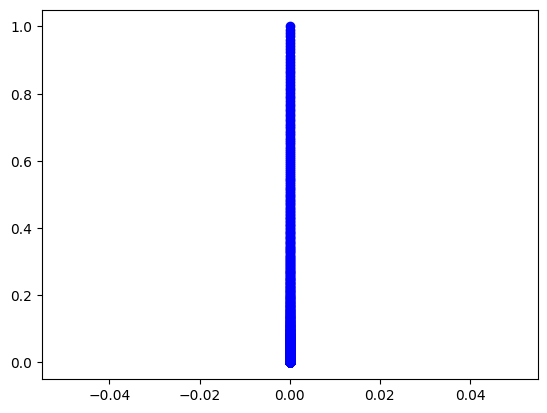

In [14]:
x0=[i for i in range(10000)]
methode_gradient(oracle3, x0,MaxIt=3000, t=0.01)

#### Task 3. Implement the Armijo's line search

In [73]:
def Armijo(x, fdex, gradient, t, oracle, m1, theta):
    p=0
    while oracle(x - t*gradient,1) >= fdex + m1 * t * np.dot(gradient,-gradient) and p<50:
        t = theta * t
        p = p + 1
    return t

#### Task 4. Equip the Gradient Method with the Armijo's line search

In [61]:
def methode_gradient_Armijo(oracle, x0, MaxIt=1000, t=0.01, tol=10e-6, m1=0.001, theta=0.2):
    x=x0
    k=0
    listx=[x0]
    listg=[]
    listf=[]
    while (np.linalg.norm(oracle(x,3)) > tol) and (k < MaxIt):
        t = Armijo(x, oracle(x,1), oracle(x,3), t, oracle, m1, theta)
        listf.append(oracle(x,1))
        listg.append(oracle(x,3))
        x = x - t * oracle(x,3)
        listx.append(x)
        k = k + 1
        
    #print(f"coordo : {listx}")
    #print(f"valeur : {listf}")
    #print(f"gradients : {listg}")
    if k==MaxIt:
        print(f"l'algorithme n'a pas convergé en moins de {MaxIt} itérations ")
        print(f"Dernier x obtenu : {x}")
        print(f"Dernier gradient obtenu : {oracle(x,3)} ")
        print(f"Dernière valeur de la fonction obtenu: {oracle(x,1)} ")
    else:
        print(f"l'algorithme a convergé en {k} itérations ")
        print(f"Coordonnées de la solution : {x}")
        print(f"Dernier gradient obtenu : {oracle(x,3)} ")
        print(f"Valeur de la solution : {oracle(x,1)} ")
    xi = [listx[i][0] for i in range(len(listx))]
    yi = [listx[i][1] for i in range(len(listx))]   
    plt.plot(xi,yi,'ob')
    plt.show()

l'algorithme a convergé en 63 itérations 
Coordonnées de la solution : [11.00000157 10.99999843]
Dernier gradient obtenu : [ 6.27710173e-06 -6.27710173e-06] 
Valeur de la solution : 9.833911462919787e-12 


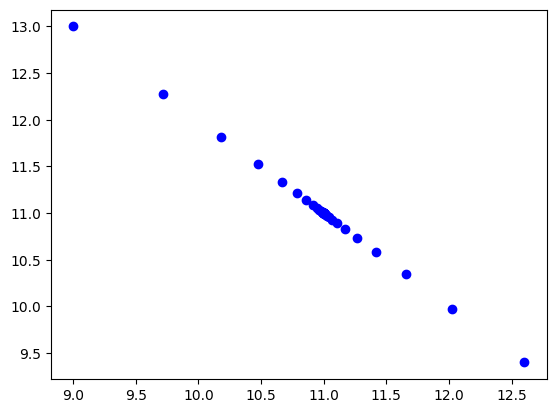

In [76]:
x0=np.array([9,13])
methode_gradient_Armijo(oracle1, x0, MaxIt=1000,t=0.45)

l'algorithme n'a pas convergé en moins de 10000 itérations 
Dernier x obtenu : [-2.7453794   7.60312861]
Dernier gradient obtenu : [-0.24069677  1.32041168] 
Dernière valeur de la fonction obtenu: 14.071453993321624 


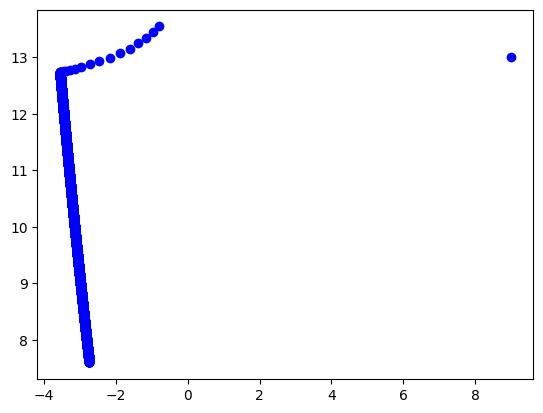

In [82]:
x0=np.array([9,13])
methode_gradient_Armijo(oracle2, x0, MaxIt=10000)

l'algorithme a convergé en 123 itérations 
Coordonnées de la solution : [5.36059907e-06 7.74308755e-06]
Dernier gradient obtenu : [5.36059907e-06 7.74308755e-06] 
Valeur de la solution : 4.4345713580575196e-11 


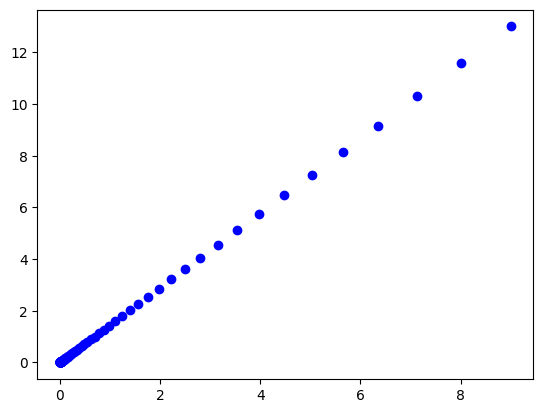

In [84]:
x0=np.array([9,13])
methode_gradient_Armijo(oracle3, x0, MaxIt=1000, t=0.11)

l'algorithme a convergé en 1427 itérations 
Coordonnées de la solution : [0.00000000e+00 5.90775791e-07 1.18155158e-06 1.77232737e-06
 2.36310317e-06 2.95387896e-06 3.54465475e-06 4.13543054e-06
 4.72620633e-06 5.31698212e-06]
Dernier gradient obtenu : [0.00000000e+00 5.90775791e-07 1.18155158e-06 1.77232737e-06
 2.36310317e-06 2.95387896e-06 3.54465475e-06 4.13543054e-06
 4.72620633e-06 5.31698212e-06] 
Valeur de la solution : 4.9734785102480436e-11 


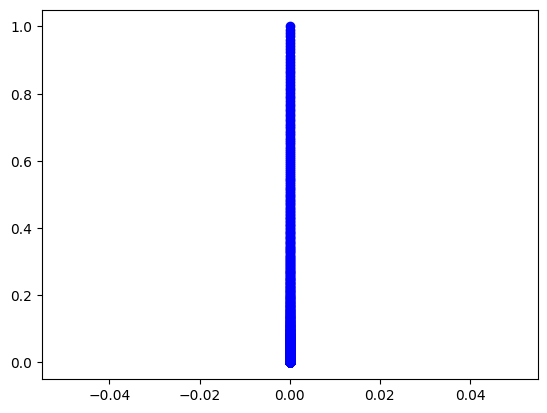

In [85]:
x0=[i for i in range(10)]
methode_gradient_Armijo(oracle3, x0,MaxIt=3000)

l'algorithme n'a pas convergé en moins de 5000 itérations 
Dernier x obtenu : [0.000e+00 1.000e+00 2.000e+00 ... 9.997e+03 9.998e+03 9.999e+03]
Dernier gradient obtenu : [0.000e+00 1.000e+00 2.000e+00 ... 9.997e+03 9.998e+03 9.999e+03] 
Dernière valeur de la fonction obtenu: 166641667500.0 


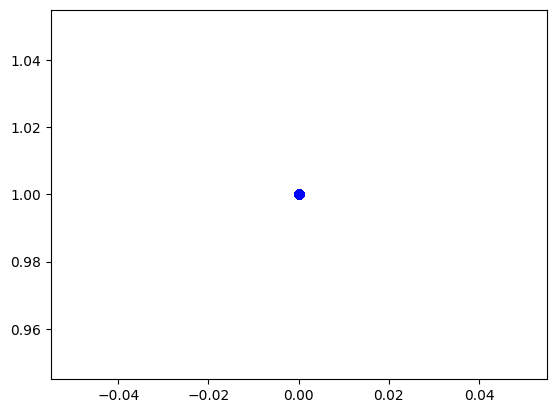

In [86]:
x0=[i for i in range(10000)]
methode_gradient_Armijo(oracle3, x0,MaxIt=5000)

#### Task 5. Apply your gradient method with Armijo's line search to the problem :

$$
\left.
    \begin{array}{lcll}
    \min_{x \in \mathfrak{R}^n} f_{4}(x) & with & f_{4}(x)=\sum_{i=0}^{n}[i(x_{i})^2+10(x_{i})^4] & \nabla f_{4}(x)=\left(
                                                                                                                        \begin{array}{c} 
                                                                                                                        2x_{1} + 40(x_{1})^3 \\
                                                                                                                        \cdots \\
                                                                                                                        2ix_{i} + 40(x_{i})^3 \\
                                                                                                                        \cdots \\
                                                                                                                        2nx_{n} + 40(x_{n})^3 \\
                                                                                                                        \end{array}
                                                                                                                    \right) \\ \\
    Set x^0 = (10,10,...,-10).
    
    \end{array}
\right.
$$

In [27]:
def oracle4(x, mode):
    if mode==1:
        return sum(np.arange(1,len(x)+1) * x**2 + 10 * x**4)
    if mode==2:
        return sum(np.arange(1,len(x)+1) * x**2 +10 * x**4), np.arange(1,len(x)+1)* x * 2 + 40 * x**3
    if mode==3:
        return np.arange(1,len(x)+1)* x * 2 + 40 * x**3

l'algorithme a convergé en 9526 itérations 
Coordonnées de la solution : [-4.99722780e-04  1.57432547e-06]
Dernier gradient obtenu : [-9.99450551e-04  6.29730186e-06] 
Valeur de la solution : 2.4972843735962827e-07 


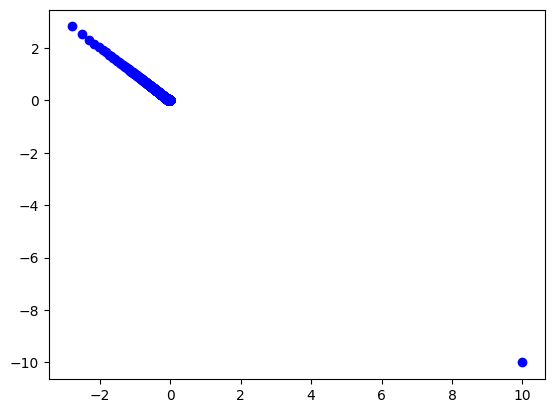

In [93]:
x0=np.array([10,-10])
methode_gradient_Armijo(oracle4, x0, MaxIt=10000, t=1, tol=10e-4, m1=0.001, theta=0.2)

l'algorithme a convergé en 9526 itérations 
Coordonnées de la solution : [-4.99722780e-04 -1.57432547e-06 -4.27974204e-09  1.09282246e-11]
Dernier gradient obtenu : [-9.99450551e-04 -6.29730186e-06 -2.56784523e-08  8.74257969e-11] 
Valeur de la solution : 2.497284374145773e-07 


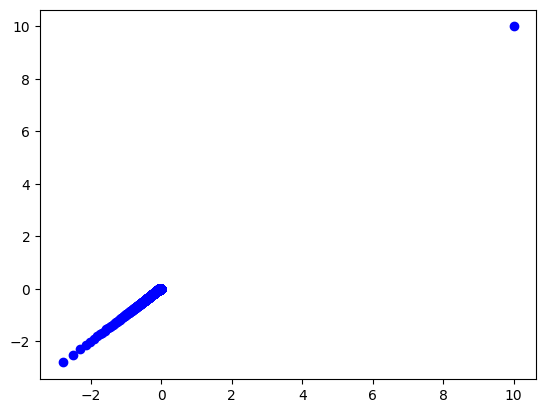

In [94]:
x0=np.array([10,10,10,-10])
methode_gradient_Armijo(oracle4, x0, MaxIt=10000, t=1, tol=10e-4, m1=0.001, theta=0.2)

### 2 Constrained optimization : a variant of the LASSAO problem

#### Task 6. Consider the following items.

##### 1. Is (LASSO) a convex optimization problem? Justify your answer.

Afin de montrer que le problème LASSO est convexe, il faut montrer que la fonction est convexe et que l'ensemble des solutions, $ x \in \mathfrak{R}^n $, est également convexe.

Démontrons que f<sub>5</sub> est convexe :

$$
\left.
    \begin{array}{llll}
    f_{5}(x) = \frac12 \left\|y-Hx\right\|^2 & \nabla f_{5}(x)=\left(
                                                                    \begin{array}{c} 
                                                                    -H_{1}.(y - Hx) \\
                                                                    \cdots \\
                                                                    -H_{j}.(y - Hx) \\
                                                                    \cdots \\
                                                                    -H_{n}.(y - Hx) \\
                                                                    \end{array}
                                                                \right)  =  H.(y-Hx) & \nabla ^2 f_{5}(x) = H^2 \ge 0\\
    \end{array}
\right.
$$

La fonction f<sub>5</sub> est de classe $ C^2 $, le gradient est dérivable et continu et le Hessien est continu.<br>
$ x \in \mathfrak{R}^n $, et $ \mathfrak{R}^n $ est ouvert et convexe. <br>
Alors f<sub>5</sub> est convexe si et seulement si son hessien est semi-defini positif $ \forall x \in \mathfrak{R}^n$ .<br>
Et comme nous pouvons le remarquer, le Hessien de la fonction f<sub>5</sub> relative au problème LASSO est toujours positif.<br>
La fonction f<sub>5</sub> est donc convexe.

Démontrons que l'ensemble des solutions, $ x \in \mathfrak{R}^n $, est également convexe :<br>


$$
\left.
    \begin{array}{lclc}
    Prenons & x,y \in X & et & \lambda \in [0,1] & \\
    Alors & \left\| x \right\|_{1} \le \tau & et & \left\| y \right\|_{1} \le \tau \\
    Comme &   x \le \left\| x \right\|_{1}& et &  y \le \left\| y \right\|_{1}\\
    \\
    On ~ a ~ alors & \lambda y + (1-\lambda)x & \le & \lambda \tau + (1-\lambda) \tau \\
    & & \le & 1 & \\
    & & \le & \tau \\


    \end{array}
\right.
$$

$ \lambda y + (1-\lambda)x \in X$ alors l'ensemble est également convexe.

Par définition, la fonction et l'ensemble étant convexe, le problème est également convexe.

##### 2. Implement an oracle for f<sub>5</sub>

In [145]:
def oracle5(x, y, H, mode):
    if mode==1:
        return 1/2 * (np.linalg.norm(y - np.dot(x,H)))**2
    if mode==2:
        return 1/2 * (np.linalg.norm(y - np.dot(x,H)))**2 , np.dot(-H,y - np.dot(x,H))
    if mode==3:
        return np.dot(-H,y - np.dot(x,H))

In [149]:
y=np.array([1,2,3,4])
H= np.array([[3,2,1,6],[6,5,4,9],[-6,5,-4,9]])
x=np.array([5,2,4])
oracle5(x,y,H,2)

(3941.9999999999995, array([556, 898, 922]))

##### 3. given a vector c $ \in \mathfrak{R} $, provide a (generic) solution of the problem 